# 와인 품질 분류 경진대회 실습

목표 : 와인의 품질을 예측하는 분류 지도학습 인공지능을 개발하는 실습

대회 페이지 : https://dacon.io/competitions/open/235610/

예제 코드 : https://dacon.io/competitions/open/235610/codeshare/4221 를 참고하여 변형하였습니다.

# LIBRARY 로딩

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

plt.style.use('fivethirtyeight')

# DATA 불러오기

In [3]:
#Load Data!
train= pd.read_csv("data/train.csv", index_col=None)
test = pd.read_csv("data/test.csv", index_col=None)
submission= pd.read_csv("data/sample_submission.csv")

In [3]:
train

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


학습 데이터셋 변수 설명 

(https://dacon.io/competitions/open/235610/data 참고)

* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

In [4]:
test

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red


테스트 데이터셋은 quality 변수가 제외되어 있음

In [5]:
submission

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


서브미션 파일은 테스트 데이터셋에 대한 quality를 예측하여 제출해야 함

In [6]:
#drop index column
train= train.drop(['index'],axis=1)
test= test.drop(['index'],axis=1)
train.shape, test.shape, submission.shape

((5497, 13), (1000, 12), (1000, 2))

# 탐색적 데이터 분석(EDA)

## pandas의 기본 요약 함수 활용 확인하기

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [8]:
train.describe(include='all')

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,white
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4159
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,NaN
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,NaN
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,NaN
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,NaN
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,NaN
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,NaN


피쳐들의 스케일(단위)가 다르기 때문에 추후에'표준화' 진행합니다. 

e.g. ```density```와 ```pH```는 단위가 다르죠 :)

## pandas_profiling 라이브러리 활용하여 확인하기

In [9]:
#import pandas_profiling as pp
#report = train.profile_report()
#report.to_file("profiling.html")

pandas profiling 으로 간단하게 훑어봅니다.

* Overview에서 각 피쳐, 상관관계, 결측값 등의 정보를 얻을 수 있습니다. 
    * 각 피쳐의 Toggle detais를 눌러 상세히 봅니다.
* Warnings(28) 탭에서 상관관계에 대한 정보를 얻을 수 있습니다.

## 직접 시각화해서 확인하기

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64


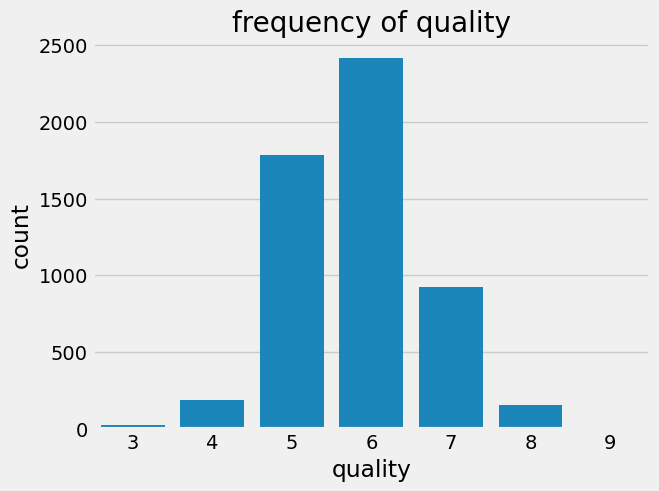

In [10]:
print(train['quality'].value_counts())
sns.countplot(x=train['quality']);
plt.title("frequency of quality", fontsize=20);

6등급의 와인이 가장 많이 있네요!

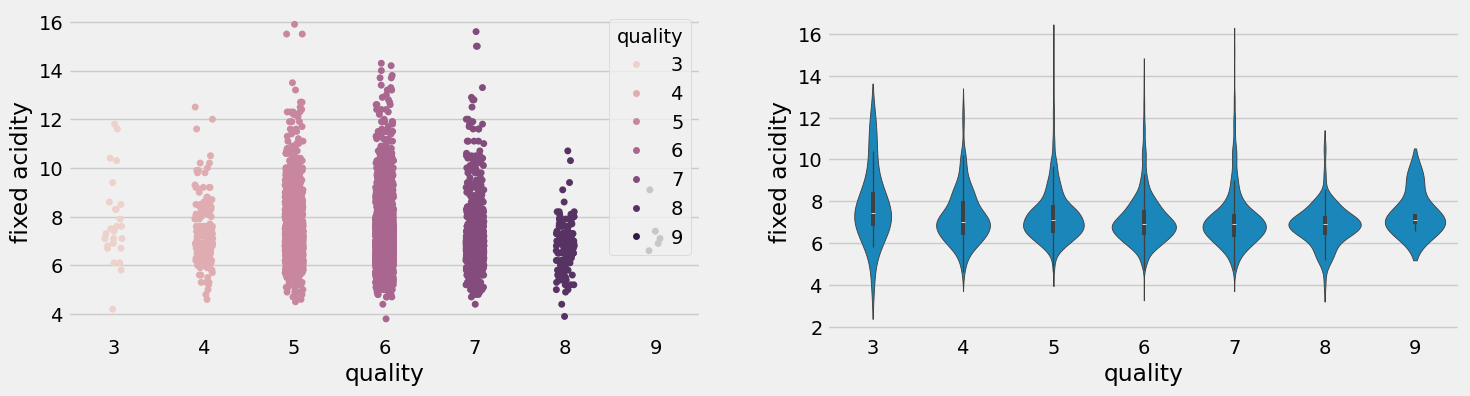

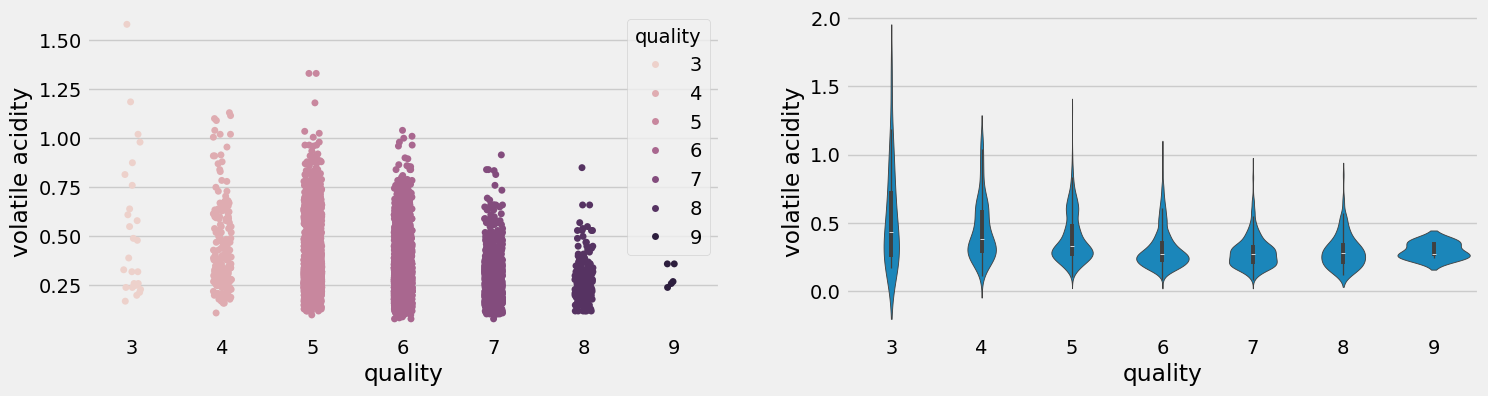

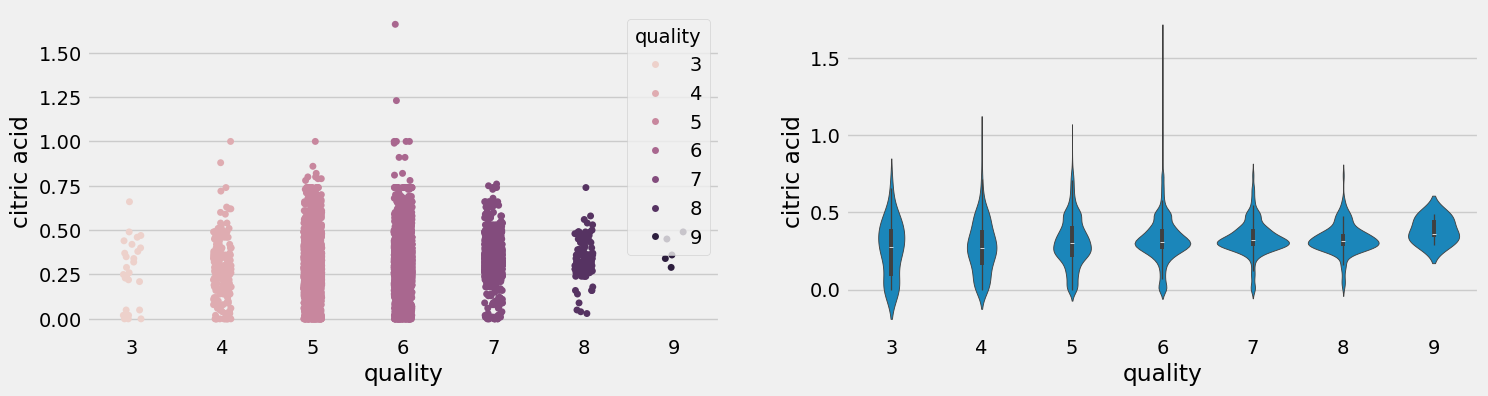

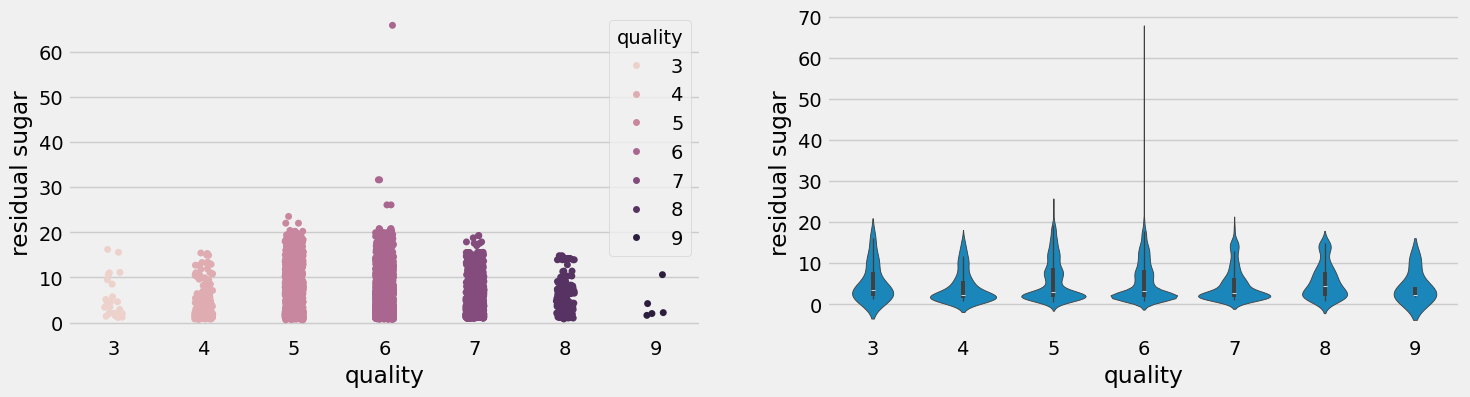

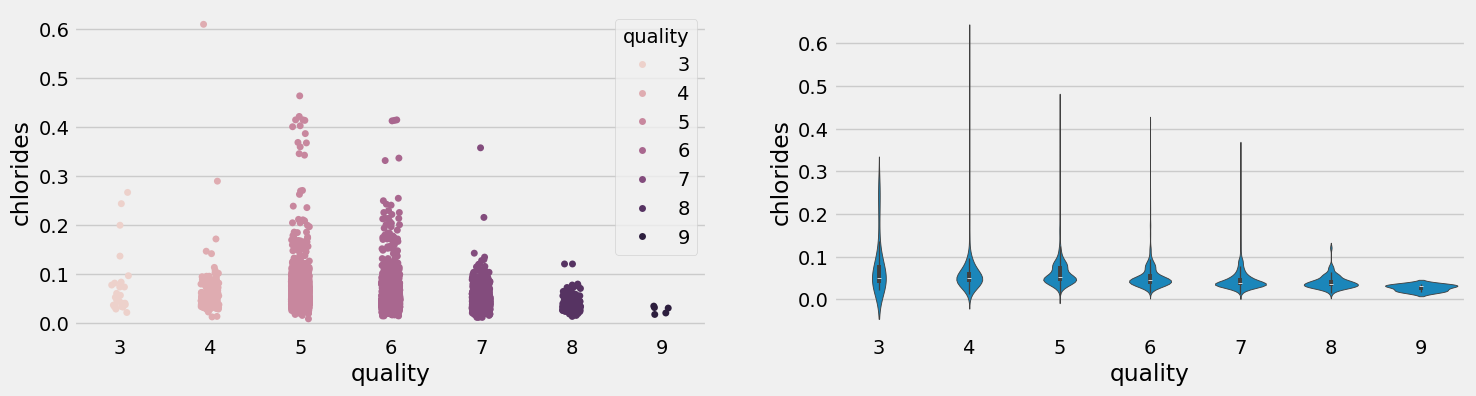

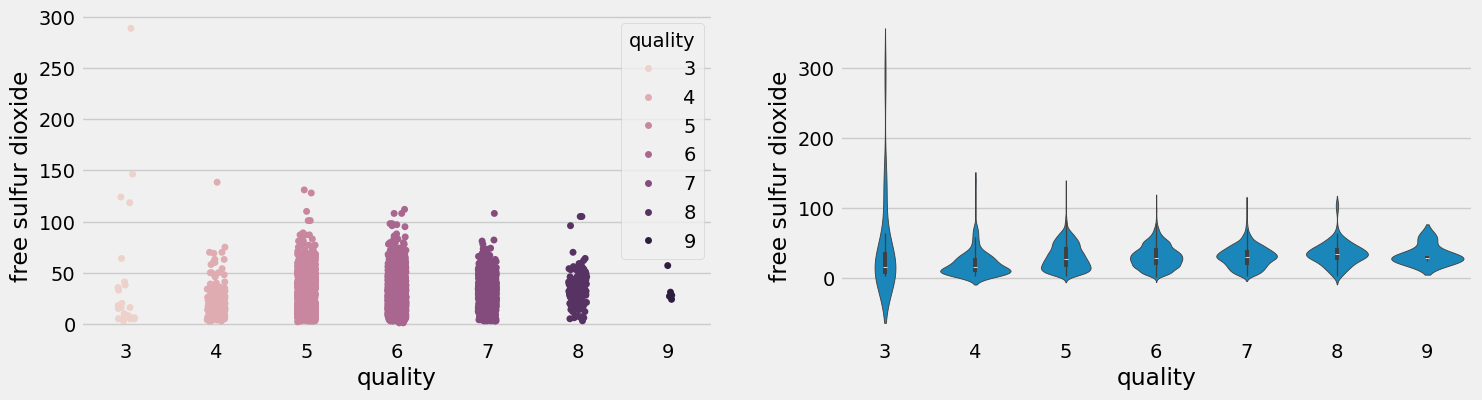

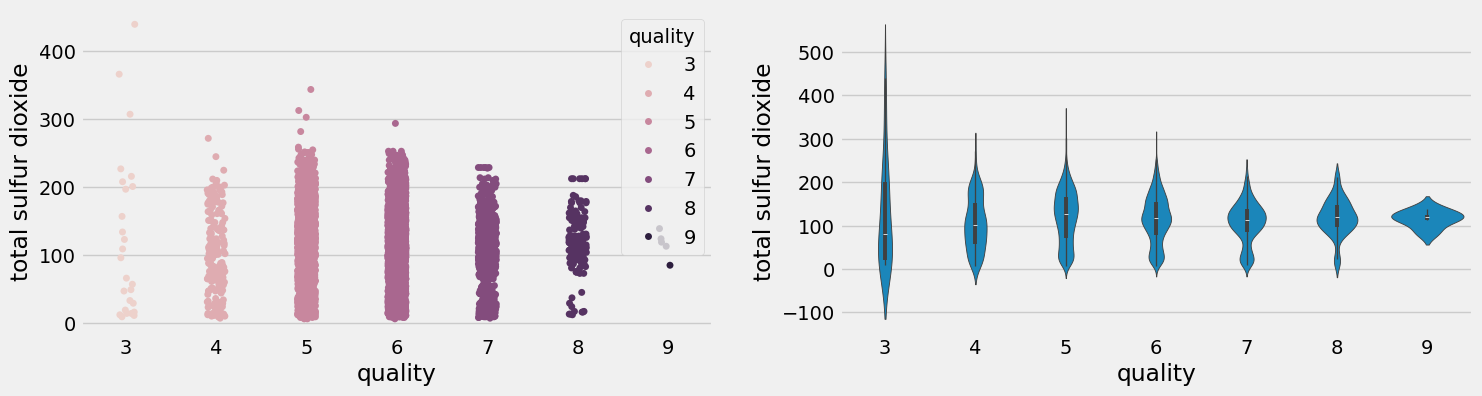

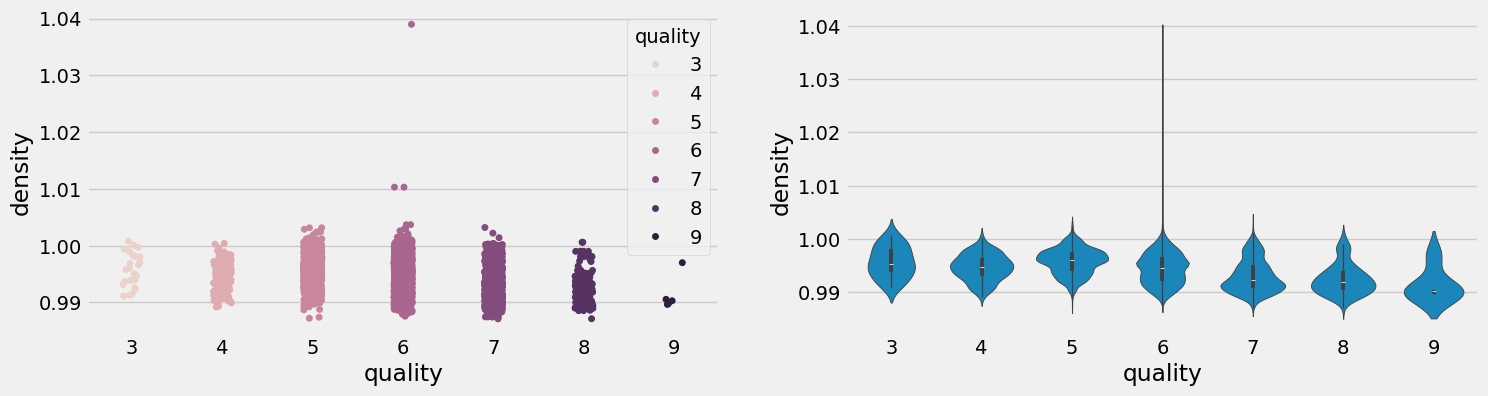

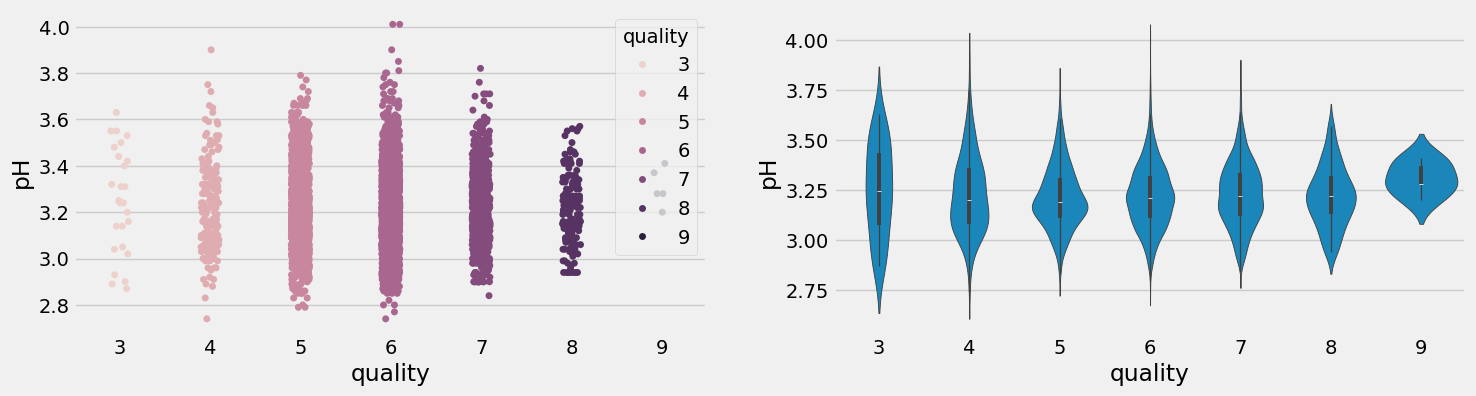

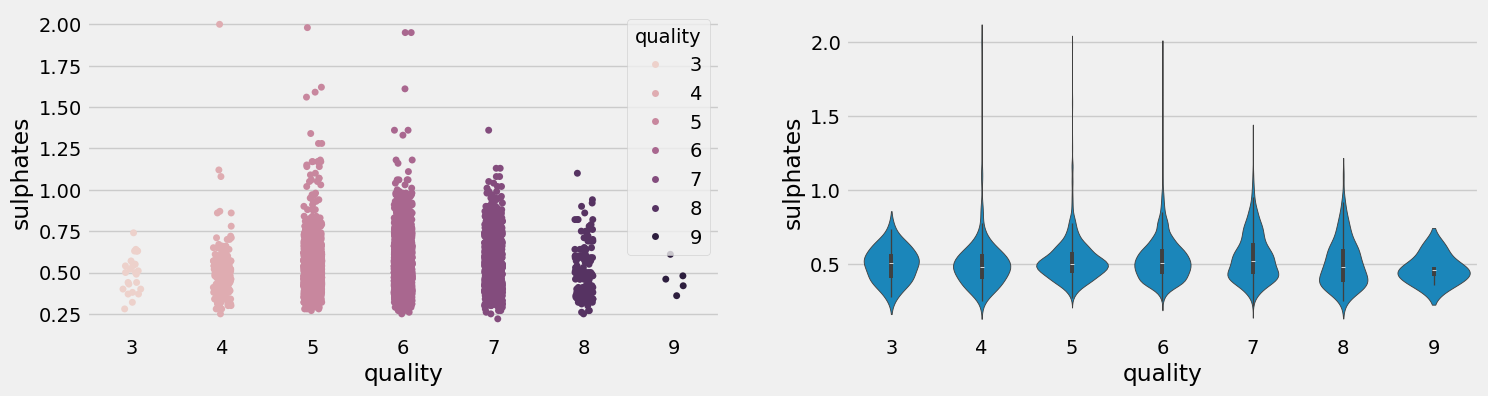

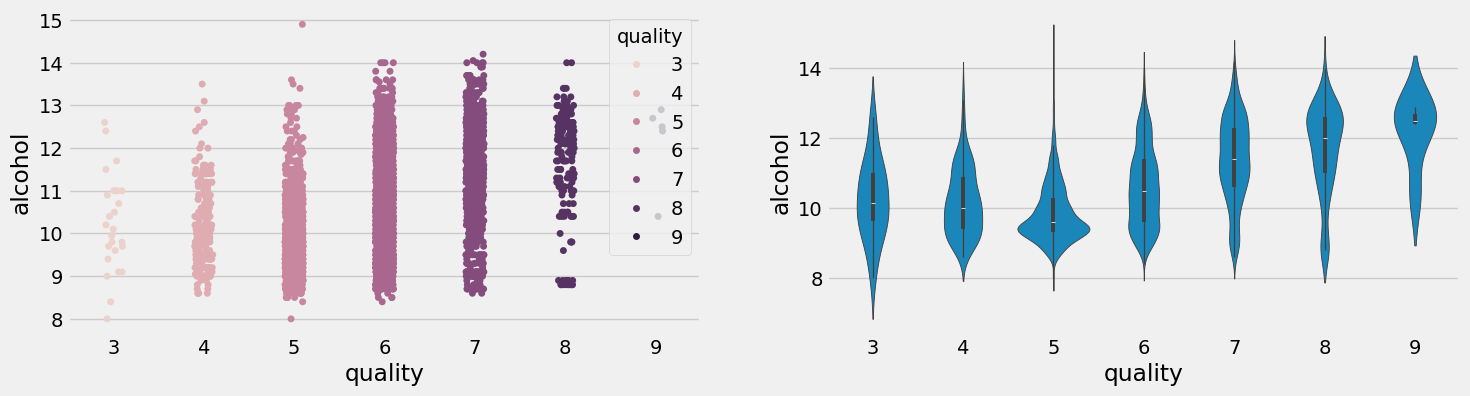

In [11]:
#distribution by 'quality'
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')
def show_dist_plot(df, columns):
    for column in columns:
        f, ax = plt.subplots(1,2,figsize=(16,4))
        sns.stripplot(x=df['quality'],y=df[column], ax=ax[0],hue=df['quality'])
        sns.violinplot(data=df, x='quality', y=column, ax=ax[1])
        
show_dist_plot(train, numerical_columns)

모든 피쳐들의 의미를 헤아리고, 유의미한 피쳐를 찾는 것은 분석에 있어 큰 도움이 됩니다.<br>
그러나, 피쳐의 수가 50개가 넘는다면? 모든 피쳐들을 헤아리기 힘들겠죠! <br>
그래서 피쳐들이 많을 때 ```train.corr()``` 상관관계를 통해서 힌트를 얻곤 합니다.

In [12]:
#plt.figure(figsize=(18,8))
#corr= train.corr()
#sns.heatmap(corr, annot=True, square=False, vmin=-.6, vmax=1.0);

**주의! 상관관계와 인관관계는 다릅니다 **  <br>

분포에서의 관계가 있음을 알려주는 것이지, 원인과 결과의 관계는 아니라는 것! 기억해주세요 :)

관련 문서: https://ko.wikipedia.org/wiki/상관관계와_인과관계

# 데이터 전처리

In [13]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

#Standardscaler
ss= StandardScaler()
ss.fit(train[numerical_columns])
train[numerical_columns] = ss.transform(train[numerical_columns])
test[numerical_columns] = ss.transform(test[numerical_columns])

#factorize
le = LabelEncoder()
le.fit(train['type'])
train['type'] = le.transform(train['type'])
test['type'] = le.transform(test['type'])

In [14]:
train.head(3)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,-1.250611,2.186377,-1.78194,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,5,1.234899,1.665574,-1.23056,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,5,0.535849,-0.785265,0.49250,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1


In [15]:
test.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.390243,-0.172555,1.112802,0.244295,-0.369640,-1.098765,-0.756293,-0.289803,-1.988209,-1.007643,0.916835,1
1,4.730148,0.562696,1.802026,-0.743880,0.409577,-0.872422,-1.342614,1.900261,-0.992553,-0.271277,-1.259963,0
2,-0.551562,-0.356368,-0.334569,-0.050055,-0.456220,0.768567,1.127044,0.042025,-0.183584,1.067570,-0.925071,1


StandardScaler를 통해서 **표준화** 작업을 진행하였고, <br>
type을 0과 1로 변환해주었습니다. ML에서는 str은 들어가지 않으니 변환은 꼭! <br>
이외에도 encoding에는 ```pd.get_dummies()```, ```labelEncoder``` 등이 있습니다.

# 모델링(학습)

## 라이브러리

In [16]:
#Library
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score

## 데이터셋 구조화(X, Y 나누기)

In [17]:
X = train.drop(['quality'],axis=1)
y = train.quality

In [18]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,-1.250611,2.186377,-1.781940,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287,1
1,1.234899,1.665574,-1.230560,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348,0
2,0.535849,-0.785265,0.492500,-0.722855,0.034399,-0.532907,0.398583,-0.966732,-1.054782,-0.070450,0.330774,1
3,-0.163201,-0.785265,-0.058879,0.118145,-0.283060,-0.080221,-0.134436,-0.256620,0.252016,-0.204334,0.247051,1
4,0.458177,0.378883,-0.403491,0.854020,0.092119,0.089537,1.109276,0.274305,-1.117010,-0.672931,0.330774,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.380505,-1.152890,-0.196724,-0.870030,-0.773678,-1.155351,-0.916198,-0.488900,0.812072,-0.940700,-0.339010,1
5493,-0.706906,-0.969078,0.285733,-0.891055,-0.629379,-0.249978,-0.081134,-1.305196,-0.370269,-0.137392,0.414497,1
5494,0.458177,-1.152890,0.147888,-0.912080,-0.600519,0.032951,-0.400946,-1.232194,-0.930325,1.268397,0.665666,1
5495,-0.473889,0.440154,-0.058879,-0.806955,-0.398500,-0.702665,-0.258808,-0.903684,-0.556954,-0.806815,-0.004118,1


In [19]:
y

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

## 데이터셋 구조화(훈련/검증 데이터셋 나누기)

In [20]:
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=.2, random_state=42, stratify=y)
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((4397, 12), (4397,), (1100, 12), (1100,))

* ```test_size : 0.2```   train과 test를 8:2로 구분한다는 의미!
* ```random_state : 42``` 같은 값으로 나오게 하기 위한 Seed 설정! 

X_train과 X_validation에서 type을 제외한 12개의 Feature이 있는 것을 볼 수 있습니다.

## 모델 학습(훈련 데이터셋)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# 1. Logistic Regression
modelname = "LogisticRegression"
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
ypred_validation = model1.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 2. Decision Tree
modelname = "DecisionTree"
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
ypred_validation = model2.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 3. Random Forest
modelname = "RandomForest"
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
ypred_validation = model3.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 4. Gradient Boosting
modelname = "GradientBoosting"
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_train)
ypred_validation = model4.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 5. AdaBoost
modelname = "AdaBoost"
model5 = AdaBoostClassifier()
model5.fit(X_train, y_train)
ypred_validation = model5.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 6. K-Nearest Neighbors
modelname = "KNN"
model6 = KNeighborsClassifier(n_neighbors=5)
model6.fit(X_train, y_train)
ypred_validation = model6.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 7. Support Vector Machine
modelname = "SVM"
model7 = SVC(probability=True)  # SVM의 경우 확률 예측을 켜야 log_loss 가능
model7.fit(X_train, y_train)
ypred_validation = model7.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 8. Naive Bayes
modelname = "NaiveBayes"
model8 = GaussianNB()
model8.fit(X_train, y_train)
ypred_validation = model8.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 9. Multi-Layer Perceptron (Neural Network)
modelname = "MLP"
model9 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model9.fit(X_train, y_train)
ypred_validation = model9.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

LogisticRegression Validation Accuracy Score :  0.5281818181818182
DecisionTree Validation Accuracy Score :  0.5572727272727273
RandomForest Validation Accuracy Score :  0.66
GradientBoosting Validation Accuracy Score :  0.57
AdaBoost Validation Accuracy Score :  0.48727272727272725
KNN Validation Accuracy Score :  0.5545454545454546
SVM Validation Accuracy Score :  0.5445454545454546
NaiveBayes Validation Accuracy Score :  0.37454545454545457
MLP Validation Accuracy Score :  0.5390909090909091


In [27]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 10. XGBoost
modelname = "XGBoost"
model10 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=1000)
model10.fit(X_train, y_train - 3)
ypred_validation = model10.predict(X_validation) + 3
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 11. LightGBM
modelname = "LightGBM"
model11 = LGBMClassifier(n_estimators=1000)
model11.fit(X_train, y_train)
ypred_validation = model11.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

# 12. CatBoost
modelname = "CatBoost"
model12 = CatBoostClassifier(n_estimators=1000, verbose=0)  # 학습 로그 줄이기 위해 verbose=0
model12.fit(X_train, y_train)
ypred_validation = model12.predict(X_validation)
print(modelname, "Validation Accuracy Score : ", accuracy_score(y_validation, ypred_validation))

/opt/homebrew/anaconda3/envs/team_project/lib/python3.14/site-packages/xgboost/training.py:199: UserWarning: [09:50:09] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1762060257953/work/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Validation Accuracy Score :  0.64
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1501
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.384731
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [28]:
import numpy as np
import pandas as pd
from sklearn.base import clone
from sklearn.inspection import permutation_importance

# 모델 목록 (이미 학습된 모델 객체 사용)
models = [
    ("LogisticRegression", model1),
    ("DecisionTree",       model2),
    ("RandomForest",       model3),
    ("GradientBoosting",   model4),
    ("AdaBoost",           model5),
    ("KNN",                model6),
    ("SVM",                model7),
    ("NaiveBayes",         model8),
    ("MLP",                model9),
    ("XGBoost",            model10),
    ("LightGBM",           model11),
    ("CatBoost",           model12),
]

# SVM의 경우 확률 예측을 켜야 log_loss 가능
def ensure_proba_estimator(name, est):
    if hasattr(est, "predict_proba"):
        return est
    if est.__class__.__name__ == "SVC":
        new_est = clone(est)
        new_est.set_params(probability=True)
        new_est.fit(X_train, y_train)
        return new_est
    raise ValueError(f"{name}은(는) predict_proba가 없어 log_loss 기반 permutation importance 불가")

feature_names = X_train.columns
# permutation importance 계산
all_rows = []
n_repeats = 20
random_state = 42

for name, est in models:
    result = permutation_importance(
        estimator=est,
        X=X_validation,
        y=y_validation,
        scoring="neg_log_loss",    # ★ 여기서 직접 지정
        n_repeats=n_repeats,
        random_state=random_state,
        n_jobs=-1
    )

    for feat, m, s in zip(feature_names,
                          result.importances_mean,
                          result.importances_std):
        all_rows.append({
            "model": name,
            "feature": feat,
            "delta_log_loss_mean": m,
            "delta_log_loss_std": s,
            "n_repeats": n_repeats
        })

# 결과 통합 DataFrame
pi_df = (pd.DataFrame(all_rows)
           .sort_values(["model", "delta_log_loss_mean"], ascending=[True, False])
           .reset_index(drop=True))

print(pi_df.head(20))

# (선택) 모델별 상위 10개 중요 특성 보기
topk_df = (pi_df.sort_values(["model","delta_log_loss_mean"], ascending=[True, False])
                .groupby("model")
                .head(10)
                .reset_index(drop=True))
print("\n[Top-10 per model by Δlog_loss]")
print(topk_df)

       model               feature  delta_log_loss_mean  delta_log_loss_std  \
0   AdaBoost               alcohol             0.001670            0.000104   
1   AdaBoost      volatile acidity             0.000314            0.000066   
2   AdaBoost   free sulfur dioxide             0.000164            0.000041   
3   AdaBoost             sulphates             0.000142            0.000026   
4   AdaBoost           citric acid             0.000025            0.000008   
5   AdaBoost  total sulfur dioxide             0.000013            0.000017   
6   AdaBoost             chlorides             0.000003            0.000009   
7   AdaBoost                    pH             0.000002            0.000008   
8   AdaBoost         fixed acidity             0.000000            0.000000   
9   AdaBoost        residual sugar             0.000000            0.000000   
10  AdaBoost               density             0.000000            0.000000   
11  AdaBoost                  type             0.000

In [30]:
# 보기 좋게 정렬 (옵션)
pivot_df = topk_df.pivot_table(
    index="feature",
    columns="model",
    values="delta_log_loss_mean",
    aggfunc="mean"
)
pivot_df = pivot_df.fillna(0)
pivot_df

model,AdaBoost,CatBoost,DecisionTree,GradientBoosting,KNN,LightGBM,LogisticRegression,MLP,NaiveBayes,RandomForest,SVM,XGBoost
feature,,,,,,,,,,,,
alcohol,0.001670,0.228830,5.737494,0.220256,1.712913,0.412658,0.178342,0.226014,0.079100,0.328558,0.139901,0.278045
chlorides,0.000003,0.065308,2.116745,0.000000,0.000000,0.043624,0.000000,0.000000,0.000000,0.135065,0.000000,0.054108
citric acid,0.000025,0.057781,2.718019,0.020939,0.564707,0.089140,0.000000,0.000000,-0.074242,0.087888,0.000000,0.068088
density,0.000000,0.064447,1.956187,0.028667,0.463221,0.020641,0.147836,0.512228,-0.107925,0.169061,0.071554,0.133506
fixed acidity,0.000000,0.000000,0.000000,0.018183,0.466443,0.000000,0.058412,0.132114,0.018815,0.085232,0.032335,0.000000
free sulfur dioxide,0.000164,0.093247,1.943081,0.051258,0.542172,0.145449,0.023525,0.169908,-0.037835,0.000000,0.037456,0.094024
pH,0.000002,0.069518,1.716989,0.000000,0.825084,0.028862,0.025057,0.107649,0.010241,0.071184,0.034036,0.062820
residual sugar,0.000000,0.063203,1.775969,0.044046,1.038428,0.082029,0.120300,0.288583,-0.033768,0.121054,0.049739,0.062912
sulphates,0.000142,0.133478,1.567899,0.042600,0.893498,0.173429,0.035199,0.149614,-0.083338,0.091114,0.057505,0.145899


In [31]:
# delta_log_loss_mean 값이 클수록 중요 → rank(ascending=False)
ranking_df = pivot_df.rank(axis=0, ascending=False, method="min")

# 평균 랭킹 추가 (행 기준 평균)
ranking_df["mean_rank"] = ranking_df.mean(axis=1)

# mean_rank 기준으로 정렬 (선택)
ranking_df = ranking_df.sort_values("mean_rank")

ranking_df

model,AdaBoost,CatBoost,DecisionTree,GradientBoosting,KNN,LightGBM,LogisticRegression,MLP,NaiveBayes,RandomForest,SVM,XGBoost,mean_rank
feature,,,,,,,,,,,,,
alcohol,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.250000
volatile acidity,2.0,3.0,2.0,2.0,10.0,4.0,3.0,5.0,11.0,5.0,2.0,4.0,4.416667
total sulfur dioxide,6.0,4.0,7.0,4.0,2.0,2.0,8.0,3.0,4.0,6.0,4.0,5.0,4.583333
sulphates,4.0,2.0,10.0,6.0,4.0,3.0,7.0,7.0,9.0,7.0,5.0,2.0,5.500000
density,9.0,8.0,5.0,7.0,9.0,10.0,2.0,1.0,10.0,2.0,3.0,3.0,5.750000
residual sugar,9.0,9.0,8.0,5.0,3.0,7.0,4.0,2.0,6.0,4.0,6.0,8.0,5.916667
free sulfur dioxide,3.0,5.0,6.0,3.0,7.0,5.0,10.0,6.0,7.0,11.0,7.0,6.0,6.333333
citric acid,5.0,10.0,3.0,9.0,6.0,6.0,11.0,11.0,8.0,8.0,11.0,7.0,7.916667
pH,8.0,6.0,9.0,11.0,5.0,9.0,9.0,10.0,3.0,10.0,8.0,9.0,8.083333


In [32]:
pivot_df.to_csv("permutation_importance_table.tsv", sep="\t", index=True)

In [33]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, ttest_ind, f_oneway, chi2_contingency

# 분석 대상 변수
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns.drop('quality')
cat_cols = train.select_dtypes(exclude=['float64', 'int64']).columns

results = []

# 1️⃣ quality (연속형) vs. 각 수치형 변수 → 상관검정
for col in numeric_cols:
    r, p = spearmanr(train['quality'], train[col])
    results.append({
        'Variable': col,
        'Type': 'Numeric',
        'Test': 'Spearman correlation',
        'Statistic (r)': round(r, 3),
        'p-value': p
    })

# 2️⃣ quality vs. 범주형 변수(type 등)
for col in cat_cols:
    groups = [train[train[col]==level]['quality'] for level in train[col].unique()]
    if len(groups) == 2:
        stat, p = ttest_ind(*groups, equal_var=False)
        test_name = 'T-test'
    else:
        stat, p = f_oneway(*groups)
        test_name = 'ANOVA'
    results.append({
        'Variable': col,
        'Type': 'Categorical',
        'Test': test_name,
        'Statistic (F or t)': round(stat, 3),
        'p-value': p
    })

# 결과 요약표
summary = pd.DataFrame(results)
summary.sort_values('p-value', inplace=True)
summary

,Variable,Type,Test,Statistic (r),p-value
10,alcohol,Numeric,Spearman correlation,0.444,6.438718e-264
7,density,Numeric,Spearman correlation,-0.321,6.066217e-132
4,chlorides,Numeric,Spearman correlation,-0.292,2.758652e-108
1,volatile acidity,Numeric,Spearman correlation,-0.252,1.976299e-80
11,type,Numeric,Spearman correlation,0.123,6.812669e-20
2,citric acid,Numeric,Spearman correlation,0.099,1.790345e-13
0,fixed acidity,Numeric,Spearman correlation,-0.097,7.304104e-13
5,free sulfur dioxide,Numeric,Spearman correlation,0.089,4.678576e-11
6,total sulfur dioxide,Numeric,Spearman correlation,-0.052,1.000252e-04
9,sulphates,Numeric,Spearman correlation,0.035,8.796723e-03


## 모델 예측(시험 데이터셋)

In [34]:
# submission 파일에 저장
ypred_test = model3.predict(test)
submission['quality'] = ypred_test
submission.to_csv("submission.csv",index=False)

In [35]:
X_train.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'type'],
      dtype='object')

이상 기초적인 와인 품질 분류였습니다. 감사합니다.